In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import zipfile


zip_ref = zipfile.ZipFile("/content/drive/My Drive/train.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/My Drive/val.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [1]:
import shutil
import os
import numpy as np
import json
import pandas as pd
import pprint
import time
import cv2
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread, imshow, imread_collection, concatenate_images
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from keras.initializers import glorot_uniform
from keras import backend as K
K.clear_session()


In [2]:
def conv_2d( X, strides, kernel, name):
        """2D convolution
        Args:
            X: 4D tensor, image or feature map
            strides: int, stride for convolution
            kernel: list, 3 elements - size of kernel and number of filters
            name: string, name of layer
        Returns:
            X: 4D tensor, output after convolution and bias operations
        """

        with tf.compat.v1.variable_scope(name) as scope:
            W = tf.compat.v1.get_variable(shape=[kernel[0], kernel[1], X.shape[3], kernel[2]], 
                                dtype=tf.float32, name=name + '_weights')
            b = tf.compat.v1.get_variable(shape=[kernel[2]], dtype=tf.float32, 
                                name=name + '_bias')

        X = tf.nn.conv2d(X, W, [1, strides, strides, 1], padding='SAME', name=None)
        X = X + b

        return X

In [3]:
def model_DRN26(input):
  

  X=Conv2D(16, (7, 7), padding='same',name='layer1_conv')(input)

  #short_link=conv_2d(X, 1,[1, 1, 16],'short')
  short_link=Conv2D(16, (1, 1),padding='same')(X)

  X = Conv2D(16, (3, 3),strides=(1, 1),padding='same',activation='relu' ,name='layer2_conv')(X)
  X = Conv2D(16, (3, 3),strides=(1, 1),padding='same',activation='relu', name='layer3_conv')(X)
  
  X = Add()([short_link, X])
  #X=  tf.add(short_link, X)
  X = Activation('relu')(X)
  #X =  tf.nn.relu(X)

#*******************************************************************************

  short_link=Conv2D(20, (1, 1),padding='same')(X)

  X = Conv2D(20, (3, 3),padding='same',activation='relu' ,name='layer4_conv')(X)
  X = Conv2D(20, (3, 3),padding='same',activation='relu', name='layer5_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

  X = MaxPooling2D(pool_size=(2, 2), padding="valid",name='layer4_Max')(X)

#*******************************************************************************
  #short_link=Conv2D(64, (1, 1),padding='same')(X)
  
  #X = Conv2D(64, (3, 3),padding='same',activation='relu' ,name='layer4_conv')(X)
  #X = Conv2D(64, (3, 3),padding='same',activation='relu', name='layer5_conv')(X)
  #X = Add()([short_link, X])
  #X = Activation('relu')(X)

  short_link=Conv2D(32, (1, 1),padding='same')(X)
  
  X = Conv2D(32, (3, 3),strides=(1, 1),padding='same',activation='relu' ,name='layer6_conv')(X)
  X = Conv2D(32, (3, 3),strides=(1, 1),padding='same',activation='relu', name='layer7_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

#*******************************************************************************
  short_link=Conv2D(64, (1, 1),padding='same')(X)
  
  X = Conv2D(64, (3, 3),padding='same',activation='relu' ,name='layer8_conv')(X)
  X = Conv2D(64, (3, 3),padding='same',activation='relu', name='layer9_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

  #short_link=Conv2D(128, (1, 1),padding='same')(X)
  
  #X = Conv2D(128, (3, 3),padding='same',activation='relu' ,name='layer10_disconv')(X)
  #X = Conv2D(128, (3, 3),padding='same',activation='relu', name='layer11_disconv')(X)
  #X = Add()([short_link, X])
  #X = Activation('relu')(X)

#*******************************************************************************
  X = MaxPooling2D(pool_size=(2, 2), padding="valid")(X)
  
  short_link=Conv2D(128, (1, 1),padding='same')(X)
  
  X = Conv2D(128, (3, 3),padding='same',dilation_rate=2,activation='relu' ,name='layer12_disconv')(X)
  X = Conv2D(128, (3, 3),padding='same',dilation_rate=2,activation='relu', name='layer13_disconv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

  short_link=Conv2D(128, (1, 1),padding='same')(X)
  
  X = Conv2D(128, (3, 3),padding='same',dilation_rate=2,activation='relu' ,name='layer14_disconv')(X)
  X = Conv2D(128, (3, 3),padding='same',dilation_rate=2,activation='relu', name='layer15_disconv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)
#*******************************************************************************
  

  short_link=Conv2D(256, (1, 1),padding='same')(X)
  
  X = Conv2D(256, (3, 3),padding='same',dilation_rate=4,activation='relu' ,name='layer16_disconv')(X)
  X = Conv2D(256, (3, 3),padding='same',dilation_rate=4,activation='relu', name='layer17_disconv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

  short_link=Conv2D(256, (1, 1),padding='same')(X)
  
  X = Conv2D(256, (3, 3),padding='same',dilation_rate=2,activation='relu' ,name='layer18_conv')(X)
  X = Conv2D(256, (3, 3),padding='same',dilation_rate=2,activation='relu', name='layer19_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)
#*******************************************************************************
  X = MaxPooling2D(pool_size=(2, 2), padding="valid")(X)

  short_link=Conv2D(128, (1, 1),padding='same')(X)
  
 
  X = Conv2D(128, (3, 3),padding='same',activation='relu' ,name='layer20_conv')(X)
  X = Conv2D(128, (3, 3),padding='same',activation='relu', name='layer21_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)

  #X = MaxPooling2D(pool_size=(2, 2), padding="valid")(X)

  short_link=Conv2D(64, (1, 1),padding='same')(X)
  
  X = Conv2D(64, (2, 3),padding='same',activation='relu' ,name='layer22_conv')(X)
  X = Conv2D(64, (2, 3),padding='same',activation='relu', name='layer23_conv')(X)
  X = Add()([short_link, X])
  X = Activation('relu')(X)


  return X


In [4]:
#from: width x height x channels
#to: width x height x groups x (channels/groups)
#prermute the last two dimensions
#reshape the tensor to the original shape
#https://machinelearningtokyo.com/2020/04/27/cnn-architectures-shufflenet/

def channel_shuffle(x, groups):  
    _, width, height, channels = x.get_shape().as_list()
    group_ch = channels // groups

    x = Reshape([width, height, group_ch, groups])(x)
    x = Permute([1, 2, 4, 3])(x)
    x = Reshape([width, height, channels])(x)
    return x

In [5]:
#https://machinelearningtokyo.com/2020/04/27/cnn-architectures-shufflenet/
def gconv(tensor, channels, groups):
    input_ch = tensor.get_shape().as_list()[-1]
    group_ch = input_ch // groups
    output_ch = channels // groups
    groups_list = []
 
    for i in range(groups):
        # group_tensor = tensor[:, :, :, i * group_ch: (i+1) * group_ch]
        group_tensor = Lambda(lambda x: x[:, :, :, i * group_ch: (i+1) * group_ch])(tensor)
        group_tensor = Conv2D(output_ch, 1)(group_tensor)
        groups_list.append(group_tensor)
 
    output = Concatenate()(groups_list)
    return output

In [6]:
def context_flow(input_1,input_2,name_):
  X = Concatenate()([input_1,input_2])
  X = AveragePooling2D((2, 2),  (2, 2),padding='same')(X)
  X = gconv(X, 64, groups=16)
  X = channel_shuffle(X, 16)
  X = gconv(X, 64, groups=16)

  short_link=X

  X = Conv2D(64, (1, 1),activation='relu',padding = 'same' ,name='context_flow_conv1_'+name_)(X)
  X = Activation('relu')(X)
  X = Conv2D(64, (1, 1),activation='relu' ,padding = 'same' ,name='context_flow_conv2_'+name_)(X)
  X = Activation('sigmoid')(X)
  
  X = Multiply()([short_link , X])
  X = Add()([short_link,X])

  return X



In [7]:
def AGCN(input):
  X = Conv2D(64, (1, 7), activation = 'relu', padding = 'same', name = 'AGCN_conv1' )(input)
  X = Conv2D(64, (7, 1), activation = 'relu', padding = 'same', name = 'AGCN_conv2' )(X)

  X1 = Conv2D(64, (7, 1), activation = 'relu', padding = 'same', name = 'AGCN_conv3' )(input)
  X1 = Conv2D(64, (1, 7), activation = 'relu', padding = 'same', name = 'AGCN_conv4' )(X1)

  O  = Add(name = 'add_AGCN1')([X, X1])

  short_link=O
  X = Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'AGCN_conv5' )(O)

  O  = Add(name = 'add_AGCN2')([X, short_link])

  return O

In [8]:
def model_CAM(input):
  X = AveragePooling2D(1,(16,16))(input)                      
  X = BatchNormalization()(X)                               
  X = Activation('relu')(X)    
  X = Conv2D(64, (1, 1), activation = 'relu', padding = 'same', name = 'CAM_conv1' )(X)

  X_in  = Conv2DTranspose(64 ,(71,85), use_bias = False)(X) #Conv2D(32, (1, 1),strides=(2, 2), activation = 'relu', name = 'CAM_conv2' )(input)
 
  X1  = context_flow(X_in,input,'1')

  X1  = Conv2DTranspose(64 ,(38,46), use_bias = False)(X1)

  X2 = context_flow(X1,input,'2')

  X2  = Conv2DTranspose(64 ,(38,46), use_bias = False)(X2)

  X3 = context_flow(X2,input,'3')

  X3  = Conv2DTranspose(64 ,(38,46), use_bias = False)(X3)

  O  = Add(name = 'add_FE')([X_in, X1, X2, X3])

  X = Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'CAM_conv3' )(O)

  short_link=X

  X = AveragePooling2D(1,(2, 2),padding = 'same', name = 'FS_pool')(X)
  X = Conv2D(64, (1, 1), activation = 'relu', padding = 'same', name = 'CAM_conv4')(X)
  X = BatchNormalization()(X)
  X = Activation('sigmoid')(X)

  X  = Conv2DTranspose(64 ,(38,46), use_bias = False)(X)
  X = Multiply()([X,short_link])

  X = Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'CAM_conv5')(X)

  AGCN_out=AGCN(input)

  Conc_A =  (UpSampling2D((2,2), interpolation='nearest'))(X)
  Conc_B =  (UpSampling2D((2,2), interpolation='nearest'))(AGCN_out)
  X = concatenate([Conc_A,Conc_B])
  
  X = Conv2D(40, (3, 3), activation = 'relu', padding = 'same', name = 'FinalBlock1')(X)
      
  X  = UpSampling2D((4,4), interpolation = 'nearest')(X)
  output = (Activation('softmax'))(X)

  return output
  

In [9]:
from keras.models import Model, load_model
from keras import backend as K
K.clear_session()


X_input = Input(shape=(600,720,3))

X= model_DRN26(X_input)

output=model_CAM(X)

model = Model(inputs = X_input, outputs = output, name='DRN26_CAM_Model')

model.summary()

Model: "DRN26_CAM_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600, 720, 3) 0                                            
__________________________________________________________________________________________________
layer1_conv (Conv2D)            (None, 600, 720, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
layer2_conv (Conv2D)            (None, 600, 720, 16) 2320        layer1_conv[0][0]                
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 600, 720, 16) 272         layer1_conv[0][0]                
____________________________________________________________________________________

In [10]:

def compute_mean_iou(y_true, y_pred, smooth=1):

    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def compute_mean_diec(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice



In [11]:
import datetime
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard


Adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam, metrics = [compute_mean_iou,compute_mean_diec,'accuracy'])
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

mcp_save = ModelCheckpoint('weights-improvement.rescan_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, verbose=1, min_delta=1e-4, mode='min')

In [12]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, input_image,input_height,input_width,label_values, batch_size,shuffle=True):
        'Initialization'
        
        self.batch_size = batch_size

        self.input_image = input_image
        self.input_height=input_height
        self.input_width=input_width
        self.label_values=label_values
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.input_image) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        self.list_IDs_temp_y = [self.input_image[k] for k in indexes]
        self.list_IDs_temp_x = [p.replace('/content/drive/My Drive/datasets_all/output', '/content') for p in self.list_IDs_temp_y]

        # Generate data
        X, Y = self.__data_generation(self.list_IDs_temp_x,self.list_IDs_temp_y)
        X=np.squeeze(X, axis = 1) 
        return X, Y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.input_image))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, in_X,in_Y):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        return_X=[]
        return_Y=[]
        # Generate data
        for X_Image,Y_Image in  zip(in_X,in_Y):
            # Store sample
            return_X.append(image_array(X_Image,self.input_height,self.input_width))
            return_Y.append(np.array(one_hot_it(Y_Image,self.input_height, self.input_width, self.label_values), dtype=np.uint8))

        return np.array(return_X), np.array(return_Y)

In [13]:
with open('/content/drive/My Drive/label_txt.txt') as f:
    label_to_color_map = json.load(f)

In [14]:
def load_image(path):
    image = cv2.imread(path,-1)
    return image
    
def image_array(path,height,width):
  img=np.expand_dims(np.float32(load_image(path)[:height, :width]),axis=0)/255.0
  return img

def one_hot_it(path,height,width, label_values):

    label=load_image(path)[:height, :width]
    semantic_map = []

    for key in list(label_to_color_map.keys()):
        colour = label_to_color_map[key]
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
        
    semantic_map = np.stack(semantic_map, axis=-1)
    # print("Time 2 = ", time.time() - st)

    return semantic_map

In [15]:
from glob import glob

train_image_y = glob('/content/drive/My Drive/datasets_all/output/train/*_leftImg8bit.png')
val_image_y = glob('/content/drive/My Drive/datasets_all/output/val/*_leftImg8bit.png')

In [16]:
# Generators
training_generator = DataGenerator(train_image_y,600,720,' ', batch_size=6,shuffle=True)
validation_generator = DataGenerator(val_image_y,600,720,' ', batch_size=6,shuffle=True)

In [ ]:
import time

start_time = time.time()
one_hot_it('/content/train/000128_leftImg8bit.png',600,720,' ')
end_time = time.time()
print (end_time-start_time)

0.5527749061584473


In [ ]:
a = [12]
while(1):
    a.append(a)

In [17]:

import gc
gc.collect()

model.load_weights('/content/drive/My Drive/weights-improvement.rescan_wts.hdf5')
# Train model on dataset
model.fit(training_generator, epochs=2, verbose=1,   
                    validation_data=validation_generator, 
                callbacks = [tensorboard_callback,mcp_save,reduce_lr_loss])

Epoch 1/2
  1/807 [..............................] - ETA: 0s - loss: 1.0111 - compute_mean_iou: 0.5405 - compute_mean_diec: 0.6620 - accuracy: 0.7292WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
807/807 [==============================] - 3038s 4s/step - loss: 0.8373 - compute_mean_iou: 0.5696 - compute_mean_diec: 0.7118 - accuracy: 0.7878 - val_loss: 0.9724 - val_compute_mean_iou: 0.5503 - val_compute_mean_diec: 0.6915 - val_accuracy: 0.7683
Epoch 2/2
807/807 [==============================] - 3031s 4s/step - loss: 0.8227 - compute_mean_iou: 0.5746 - compute_mean_diec: 0.7161 - accuracy: 0.7908 - val_loss: 0.9570 - val_compute_mean_iou: 0.5483 - val_compute_mean_diec: 0.6891 - val_accuracy: 0.7667


In [18]:

XX=image_array('/content/train/001133_leftImg8bit.png',600,720)

In [19]:
hist = model.predict(XX)

In [20]:
def reverse_one_hot(image):

    x = np.argmax(image, axis = -1)
    return x

In [21]:
hist_tt=reverse_one_hot(hist)

In [22]:
hist_mm=np.squeeze(hist_tt, axis = 0) 
hist_mm.shape

(600, 720)

In [23]:
label_values=[]
for key in list(label_to_color_map.keys()):
  label_values.append(label_to_color_map[key])

In [24]:
def colour_code_segmentation(image, label_values):
    
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [25]:
img=colour_code_segmentation(hist_mm, label_values)

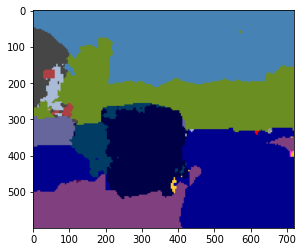

In [26]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

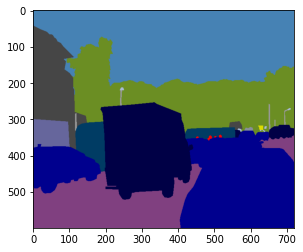

In [30]:
YY=image_array('/content/drive/My Drive/datasets_all/output/train/001133_leftImg8bit.png',600,720)
plt.imshow(np.squeeze(YY, axis = 0) )
plt.show()